# Titanic Data Analysis


In this project, we perform an exploratory data analysis of the titanic dataset from the Kaggle website by analysing, cleaning, and answering three most common questions related to Titanic.


We start by importing the necessary modules in the cell below. Seaborn and Matplotlib are used for visualization. Numpy, Pandas are used for calculations.

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import ipy_table as tbl

### Gather the data:
Let's read the data into a data frame and look at a few samples.

In [167]:
data = pd.read_csv('titanic_train.csv')

In [168]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's also generate some statistics about the numerical and categorical features.

In [169]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [170]:
data.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Thayer, Mr. John Borland",male,1601,B96 B98,S
freq,1,577,7,4,644


We observe that the data set has around 891 samples with 7 columns.

Numerical features:
* Passenger ID
* Survival status
* Passenger Class
* Age
* Siblings + Spouse
* Parents + Children
* Fare

Categorical features:
* Name
* Sex
* Ticket
* Cabin
* Embarked

### Data Cleaning
#### Outlier Removal:

Outliers can often be misleading and do not give us an accurate analysis. We can get rid of these outliers with the help of the statistics that we generated above. Looking at the table above, one can notice that the mean value of Fare is 32 and 75% of passengers paid less than 31 but the maximum value is around 512 which could potentially be an outlier. Similarly, the SibSp column also has an outlier of 8. 

We delete these samples by calculating the maximum threshold using quantile and refine our data.

In [171]:
max_threshold = data.Fare.quantile(0.99)
data = data[data['Fare'] < max_threshold]

In [172]:
data = data[data['SibSp'] < data.SibSp.quantile(0.99)]

In [173]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,870.000000,870.000000,870.000000,700.000000,870.000000,870.000000,870.000000
mean,446.781609,0.385057,2.312644,29.827386,0.426437,0.345977,28.573404
std,256.825160,0.486889,0.831598,14.488534,0.801891,0.772708,36.612973
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,225.250000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,448.500000,0.000000,3.000000,28.000000,0.000000,0.000000,13.860400
75%,666.750000,1.000000,3.000000,39.000000,1.000000,0.000000,30.000000
max,891.000000,1.000000,3.000000,80.000000,4.000000,6.000000,247.520800


In [174]:
data.shape

(870, 12)

Now, after removing the outliers the number of samples have reduced to 870. 

Next, we'll go ahead and look for null/missing values in the data set.

In [175]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          674
Embarked         2
dtype: int64

<AxesSubplot:>

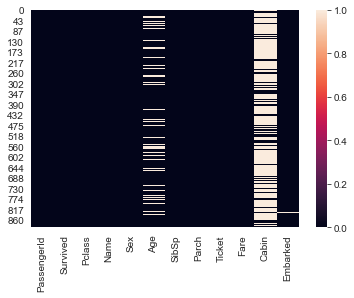

In [176]:
sns.heatmap(data.isnull())

It can be clearly observed that the columns "Age", "Cabin" have a significantly large number of missing values. These values need to be imputed for further analysis.

In [177]:
data['Cabin'].isnull().sum()/data.shape[0]

0.774712643678161

Now that cabin column has about 78% of data missing, it is better to drop the column rather than populating the null values for better results.

In [178]:
data.drop(['Cabin'], inplace=True, axis = 1)

In [179]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

The cabin column has been dropped. "Age" column needs to be imputed for null values. Before we do that, let us try and understand the correlation of the age variable with other variables in the data set. This will help us better approximate the missing values.

Let us first look at the distribution of age in the data.

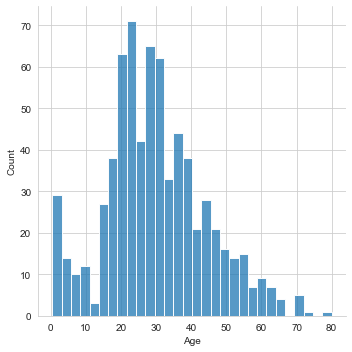

In [180]:
sns.displot(data['Age'].dropna(), kde=False, bins=30)

The plot above shows that there were more passengers in the range of 15 - 30 years. Now, let's look at how other variables relate to age by generating a correlation matrix.

In [181]:
data.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.007922,-0.037881,0.030767,-0.065777,0.007409,0.018288
Survived,-0.007922,1.000000,-0.326089,-0.083134,0.026950,0.104294,0.283477
Pclass,-0.037881,-0.326089,1.000000,-0.370447,0.050060,0.023091,-0.636551
Age,0.030767,-0.083134,-0.370447,1.000000,-0.288528,-0.186869,0.126678
SibSp,-0.065777,0.026950,0.050060,-0.288528,1.000000,0.344768,0.135066
Parch,0.007409,0.104294,0.023091,-0.186869,0.344768,1.000000,0.179892
Fare,0.018288,0.283477,-0.636551,0.126678,0.135066,0.179892,1.000000


From the table above, it can be seen that age strongly relates to the passenger class. So, this relation might help us in filling the null values in the age column.

To understand the relationship better, lets generate a box plot between age and passenger class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

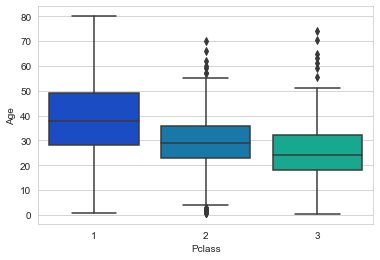

In [182]:
sns.boxplot(x='Pclass', y='Age', data=data, palette='winter')

Now, things become a bit more clear. We see that passengers of age group 30 - 50 belonged to first class and 25 - 35 were in the middle class and younger ones travelled in the third class. 

Based on this, we can fill in the missing values with the mean based on their passenger class. Lets define a function to impute the age values. Below are the mean values for each class.

In [183]:
mean1 = data[data['Pclass']==1]['Age'].mean()
mean2 = data[data['Pclass']==2]['Age'].mean()
mean3 = data[data['Pclass']==3]['Age'].mean()
mean1, mean2, mean3

(38.623841807909606, 29.87763005780347, 25.354057142857144)

In [184]:
def impute_age(cols):
    
    """
    Function handles the missing/null values in the age column by replacing 
    them with their respective mean based on their passenger class.
    
    Input: Dataframe with two columns, age and passenger class.
    Output: Returns age with imputed values.
    
    """
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return mean1

        elif Pclass == 2:
            return mean2

        else:
            return mean3

    else:
        return Age

In [185]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

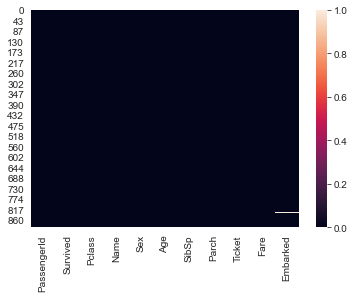

In [186]:
sns.heatmap(data.isnull())

Now, we have replaced all the null values in the age column with their respective means. "Embarked" column seems to have a couple of missing values.

In [187]:
data['Embarked'].isnull().sum()

2

In [188]:
data['Embarked'].value_counts()

S    628
C    163
Q     77
Name: Embarked, dtype: int64

We notice that "Embarked" has 2 null values and three categories out of which port S seems to be the most common one. We replace the missing values with port S.

In [189]:
data['Embarked'].fillna('S', inplace=True)

In [190]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

All the null/missing values have been handled. 

Let's drop a few columns such as Passenger ID, Ticket, Name, etc. that don't add much value to our analysis. 

In [191]:
data.drop(['Name', 'PassengerId', 'Ticket'], axis=1,  inplace=True)

In [192]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


We are done with cleaning our data. As a last step, let us convert all the categorical features into numbers by creating dummies.

#### Categorical to Numerical conversion:

In [193]:
def create_dummies(df, dummy_na = False):
    """
    Function to create dummy variables for categorical variables in the dataset.
    Input: Dataframe with a flag that specifies whether to include null values or not.
    Output: Returns a new dataframe with all numerical variables after conversion.
    
    """
    cat_cols = df[['Sex', 'Embarked']]
    cat_cols_df = pd.get_dummies(cat_cols, drop_first=True, dummy_na=dummy_na)
    df = df.select_dtypes(exclude=['object'])
    new_df = pd.concat([df, cat_cols_df], axis = 1)
    return new_df

In [194]:
clean_data = create_dummies(data, False)

In [195]:
clean_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


We now have clean data and are ready to analyse it to answer a few common questions that crop up after watching the Titanic movie.

### Analysis:

#### Question 1: 

Who survived and who didn't ? What factors decided their fate ?

The data shows that survival rate was based on luck. Lets dig deeper into what role other variables had to play in the survival process.

In [196]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

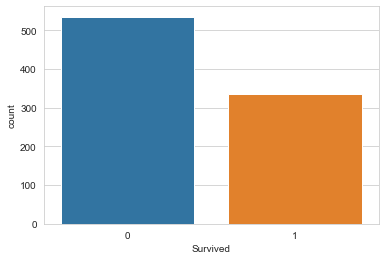

In [197]:
sns.countplot(x='Survived', data=data)

In [198]:
data.shape

(870, 8)

In [199]:
data[data['Survived']==1]['Survived'].sum()

335

The above plot shows that 335 out of 870 (38.5%) were lucky enough to have survived and 535 of them succumbed to it. This closely matches our assumption that nearly 32% of the passengers survived.

Now, let us break this down further w.r.t other variables.

In [200]:
data[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.747541
1,male,0.189381


<AxesSubplot:xlabel='Survived', ylabel='count'>

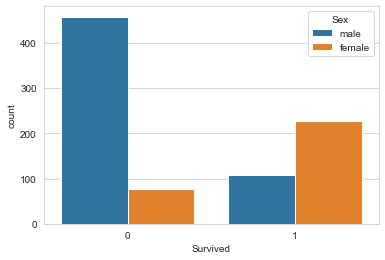

In [201]:
sns.countplot(x='Survived', hue='Sex', data=data)

In [202]:
table = pd.crosstab(data['Survived'],data['Sex'])
print(table)

Sex       female  male
Survived              
0             77   458
1            228   107


This confirms our assumption that females most likely had a better chance of survival (75%) over males(19%). This can also be proven statistically using a chi-square test. 

Null Hypothesis: Gender does not have an impact on the survival rate.

Alternate Hypothesis: Gender impacts survival rate

In [203]:
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Test','Result'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Test,Result
Chi-Square Test,258.2557
P-Value,0.0000


Since the p-value is less than 0.05, we reject the null hypothesis and accept the alternate one which states that gender affects the chance of survival.

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

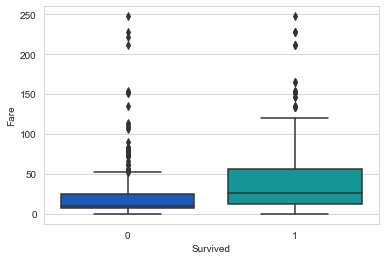

In [204]:
sns.boxplot(x='Survived', y='Fare', data=data, palette='winter')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

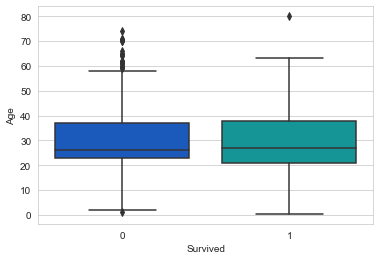

In [216]:
sns.boxplot(x='Survived', y='Age', data=data, palette='winter')

The plots make it clear that the passengers who paid a higher fare traveling in upper class had a higher probability of survival. Survival Vs Age, Gender plots also show that females and older passengers (>40 years) had a fairly high chance of survival.

Therefore, some of these calculations and visualizations confirm our assumption that there indeed was an element of luck involved and a set of passengers with a certain gender, age, and class had a better survival rate.

#### Question 2:

What kind of travelers were on board hit by this disaster ?

Let's find out more about the travelers, their age group, social class, and if they traveled alone/ with dependents.

In [205]:
data['Sex'].value_counts()

male      565
female    305
Name: Sex, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

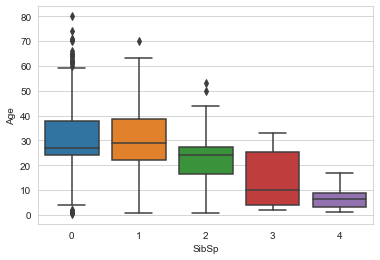

In [206]:
sns.boxplot(x='SibSp', y='Age', data=data)

<AxesSubplot:xlabel='Parch', ylabel='Age'>

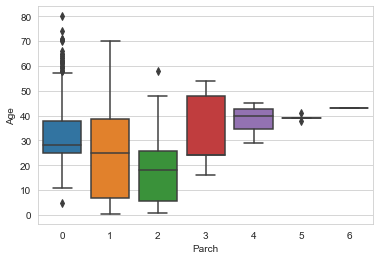

In [207]:
sns.boxplot(x='Parch', y='Age', data=data)

In [208]:
data[["SibSp", "Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.538462
2,2,0.423077
0,0,0.342149
4,4,0.166667
3,3,0.153846


In [209]:
data[["Parch", "Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
2,2,0.571429
1,1,0.547009
0,0,0.341716
5,5,0.200000
4,4,0.000000
6,6,0.000000


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

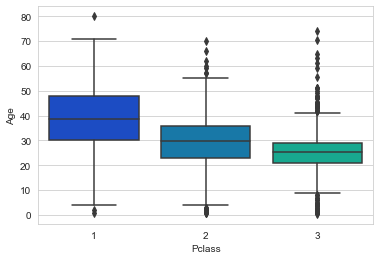

In [210]:
sns.boxplot(x='Pclass', y='Age', data=data, palette='winter')

Our sample data has more males(65%) over females(35%). From the above analysis, we see that older passengers in the age group of 30 - 50 traveled in the upper class with 0/1 dependents and the younger ones were in the lower class with parents and about 3 to 4 siblings. 

Interestingly, tabular data shows that passengers with at least one sibling/spouse and 3 parents/children had a higher chance of survival which makes sense as the ones with children fall under older passengers who were in upper class and therefore were saved first.

#### Question 3:

How did social class affect their chance of survival ?

There were three passenger classes, upper, middle, and lower. We assume that, their social class/status helped them get a quicker access to the life boats and decided their chance of survival.

<AxesSubplot:xlabel='Survived', ylabel='count'>

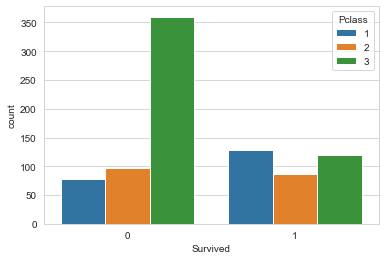

In [211]:
sns.countplot(x='Survived', hue='Pclass', data=data)

In [212]:
data[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.623188
1,2,0.472826
2,3,0.248434


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

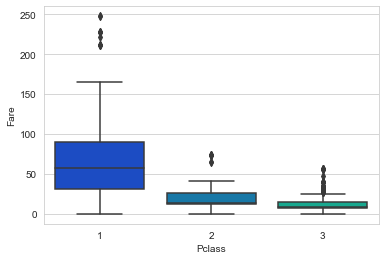

In [213]:
sns.boxplot(x='Pclass', y='Fare', data=data, palette='winter')

In [214]:
table = pd.crosstab([data['Survived']], data['Pclass'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Test','Result'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Test,Result
Chi-Square Test,93.3180
P-Value,0.0000


From the above plots, it is clear that the upper class passengers had the highest survival rate (62%) followed by the middle class (47%) and lower class (24%) who were the last ones to be saved. Since the p-value is less than 0.05, it is statiscally proven that their social class decided their probability of survival.

Another interesting find is that, upper class passengers paid a higher fare relative to the other two classes. This double-confirms our assumption that fare is directly proportional to passenger class which in turn is proportional to the survival rate.

### Conclusion:

We have reached the end of the project, where we loaded, cleaned, analysed the titanic data set and got a better insight of the data which helped us answer a few common questions.